Created on Tuesday 13/6 2023

@author: Spyridon.MONTESANTOS

Basic analysis and prediction of duplicated results of the Yanport test database.

In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import missingno as msno
pd.set_option('display.max_columns', None)

## 1. Exploration d'ensembles de données

In [2]:
cwd=os.getcwd()
datadir=os.path.join(cwd,'Dataset - Ads _ Levallois-Perret - 2019-08 - export-ads-levallois-perret-2019-08-27.csv')

df=pd.read_csv(datadir)

In [3]:
df.head()

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,SURFACE,LAND_SURFACE,BALCONY_SURFACE,TERRACE_SURFACE,ROOM_COUNT,BEDROOM_COUNT,BATHROOM_COUNT,LUNCHROOM_COUNT,TOILET_COUNT,FURNISHED,FIREPLACE,AIR_CONDITIONING,GARDEN,SWIMMING_POOL,BALCONY,TERRACE,CELLAR,PARKING,PARKING_COUNT,HEATING_TYPES,HEATING_MODE,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ELEVATOR,CARETAKER,ENERGY_CONSUMPTION,GREENHOUSE_GAS_CONSUMPTION,MARKETING_TYPE,PRICE,PRICE_M2,PRICE_EVENTS,RENTAL_EXPENSES,RENTAL_EXPENSES_INCLUDED,DEPOSIT,FEES,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY_ID,CITY,ZIP_CODE,DEPT_CODE,PUBLICATION_START_DATE,PUBLICATION_END_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE
0,22c05930-0eb5-11e7-b53d-bbead8ba43fe,http://www.avendrealouer.fr/location/levallois...,A_VENDRE_A_LOUER,APARTMENT,False,"Au rez de chaussée d'un bel immeuble récent,ap...","[""https://cf-medias.avendrealouer.fr/image/_87...",72.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.0,[],COLLECTIVE,NaN,NaN,NaN,True,NaN,NaN,NaN,RENT,1979.0,27.49,"[{""price"":1979,""date"":""2017-03-22""}]",276.0,True,NaN,NaN,NaN,False,NaN,NaN,Lamirand Et Associes,AGENCY,54178039,Levallois-Perret,92300.0,92,2017-03-22T04:07:56.095,NaN,2017-04-21T18:52:35.733,NaN
1,8d092fa0-bb99-11e8-a7c9-852783b5a69d,https://www.bienici.com/annonce/ag440414-16547...,BIEN_ICI,APARTMENT,False,Je vous propose un appartement dans la rue Col...,"[""http://photos.ubiflow.net/440414/165474561/p...",48.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,NaN,[],INDIVIDUAL,1.0,6.0,NaN,True,False,NaN,NaN,SALE,429000.0,8937.50,"[{""price"":452000.0,""date"":""2018-09-18""},{""pric...",NaN,NaN,NaN,NaN,False,False,NaN,False,Proprietes Privees,MANDATARY,54178039,Levallois-Perret,92300.0,92,2018-09-18T11:04:44.461,NaN,2019-06-06T10:08:10.89,2018-09-25
2,44b6a5c0-3466-11e9-8213-25cc7d9bf5fc,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,APARTMENT,False,"Dans un cadre arboré, calme et fleuri, un pent...","[""https://v.seloger.com/s/width/965/visuels/0/...",267.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SALE,4970000.0,18614.23,"[{""price"":4970000.0,""date"":""2019-02-19""}]",NaN,NaN,NaN,NaN,NaN,False,NaN,False,Propriétés Parisiennes,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-02-19T16:49:03.547,NaN,2019-06-13T08:22:14.314,NaN
3,e9e07ed0-812f-11e8-82aa-61eacebe4584,https://www.seloger.com/annonces/locations/bur...,SE_LOGER,PREMISES,False,"""Le meilleur coworking flexible de la ville, 5...","[""https://pix.yanport.com/ads/e9e07ed0-812f-11...",50.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RENT,89.0,1.78,"[{""price"":89.0,""date"":""2018-07-06""}]",NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,Iwg,AGENCY,54178039,Levallois-Perret,92300.0,92,2018-07-06T15:18:59.805,NaN,2019-06-18T10:40:07.405,NaN
4,872302b0-5a21-11e9-950c-510fefc1ed35,https://www.bellesdemeures.com/annonces/vente/...,BELLES_DEMEURES,HOUSE,False,Levallois - Parc de la Planchette A toute prox...,"[""https://v.seloger.com/s/width/966/visuels/0/...",330.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SALE,2790000.0,8454.55,"[{""price"":3150000.0,""date"":""2019-04-08""},{""pri...",NaN,NaN,NaN,NaN,NaN,False,NaN,False,Daniel Feau Neuilly,AGENCY,54178039,Levallois-Perret,92300.0,92,2019-04-08T17:12:20.123,NaN,2019-06-14T15:02:18.155,2019-06-14


#### 1.1 Shape, number and type of variables.

In [4]:
df.shape

(2164, 57)

In [5]:
pd.value_counts(df.dtypes)

float64    29
object     24
bool        2
int64       2
Name: count, dtype: int64

#### 1.2 Verify multiple entries.

In [6]:
print(len(df.ID.unique()))

2164


In [45]:
n_duplicates = df.duplicated().sum()
print("You seem to have {n_duplicates} duplicates in your database.")

You seem to have {n_duplicates} duplicates in your database.


#### 1.3 Study the structure of non-numerical features.

In [8]:
df.describe(exclude='number')

,ID,URL,CRAWL_SOURCE,PROPERTY_TYPE,NEW_BUILD,DESCRIPTION,IMAGES,FURNISHED,PARKING,HEATING_TYPES,HEATING_MODE,ELEVATOR,CARETAKER,MARKETING_TYPE,PRICE_EVENTS,RENTAL_EXPENSES_INCLUDED,FEES_INCLUDED,EXCLUSIVE_MANDATE,AGENCIES_UNWANTED,OCCUPIED,DEALER_NAME,DEALER_TYPE,CITY,PUBLICATION_START_DATE,LAST_CRAWL_DATE,LAST_PRICE_DECREASE_DATE
count,2164,2164,2164,2164,1973,2160,2164,467,2164,2164,653,552,247,2164,2164,600,511,2164,201,1209,2077,2164,2164,2164,2164,340
unique,2164,2164,13,5,2,1914,1947,2,2,5,3,2,2,2,1733,2,2,2,2,2,553,3,1,2103,2164,145
top,22c05930-0eb5-11e7-b53d-bbead8ba43fe,http://www.avendrealouer.fr/location/levallois...,SE_LOGER,APARTMENT,False,Une adresse de choix pour devenir propriétaire...,[],False,False,[],INDIVIDUAL,True,True,SALE,"[{""price"":1250.0,""date"":""2019-08-21""}]",True,False,False,False,False,Building Partners,AGENCY,Levallois-Perret,2019-08-08T11:53:00,2017-04-21T18:52:35.733,2019-06-14
freq,1,1,877,1436,1870,43,115,254,2007,1832,376,507,147,1219,6,578,366,1997,189,1189,144,1854,2164,11,1,12


#### 1.4 Study the structure of numerical features.

In [9]:
df.describe()

,SURFACE,LAND_SURFACE,BALCONY_SURFACE,TERRACE_SURFACE,ROOM_COUNT,BEDROOM_COUNT,BATHROOM_COUNT,LUNCHROOM_COUNT,TOILET_COUNT,FIREPLACE,AIR_CONDITIONING,GARDEN,SWIMMING_POOL,BALCONY,TERRACE,CELLAR,PARKING_COUNT,FLOOR,FLOOR_COUNT,CONSTRUCTION_YEAR,ENERGY_CONSUMPTION,GREENHOUSE_GAS_CONSUMPTION,PRICE,PRICE_M2,RENTAL_EXPENSES,DEPOSIT,FEES,CITY_ID,ZIP_CODE,DEPT_CODE,PUBLICATION_END_DATE
count,2050.000000,3.000000,0.0,25.000000,1835.000000,696.000000,0.0,0.0,0.0,0.0,0.0,14.0,6.0,0.0,86.0,0.0,157.000000,660.000000,465.000000,503.000000,0.0,0.0,2.104000e+03,1991.000000,441.000000,55.000000,94.000000,2164.0,2163.0,2164.0,0.0
mean,128.136068,30.000000,NaN,31.363600,2.243597,1.847701,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.605096,2.916667,5.827957,1965.081511,NaN,NaN,4.261142e+05,5483.773420,406.687347,2988.506000,1531.935957,54178039.0,92300.0,92.0,NaN
std,423.339898,8.660254,NaN,57.467242,1.715621,1.104508,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,1.299694,2.123793,2.432820,37.403519,NaN,NaN,6.486603e+05,5384.760624,1329.451157,8071.172419,6269.065130,0.0,0.0,0.0,NaN
min,6.000000,25.000000,NaN,5.590000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.000000,0.000000,0.000000,1870.000000,NaN,NaN,3.300000e+01,1.780000,2.000000,70.000000,29.500000,54178039.0,92300.0,92.0,NaN
25%,36.200000,25.000000,NaN,13.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.000000,1.000000,5.000000,1930.000000,NaN,NaN,1.600000e+03,32.375000,60.000000,860.500000,378.000000,54178039.0,92300.0,92.0,NaN
50%,55.000000,25.000000,NaN,18.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.000000,2.000000,6.000000,1976.000000,NaN,NaN,2.200000e+05,7586.210000,100.000000,1350.000000,639.670000,54178039.0,92300.0,92.0,NaN
75%,93.000000,32.500000,NaN,26.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,2.000000,4.000000,7.000000,1997.000000,NaN,NaN,6.097500e+05,10056.750000,151.000000,2450.000000,806.700000,54178039.0,92300.0,92.0,NaN
max,10287.000000,40.000000,NaN,300.000000,10.000000,8.000000,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,9.000000,14.000000,19.000000,2021.000000,NaN,NaN,6.000000e+06,89000.000000,14287.330000,60000.000000,60000.000000,54178039.0,92300.0,92.0,NaN


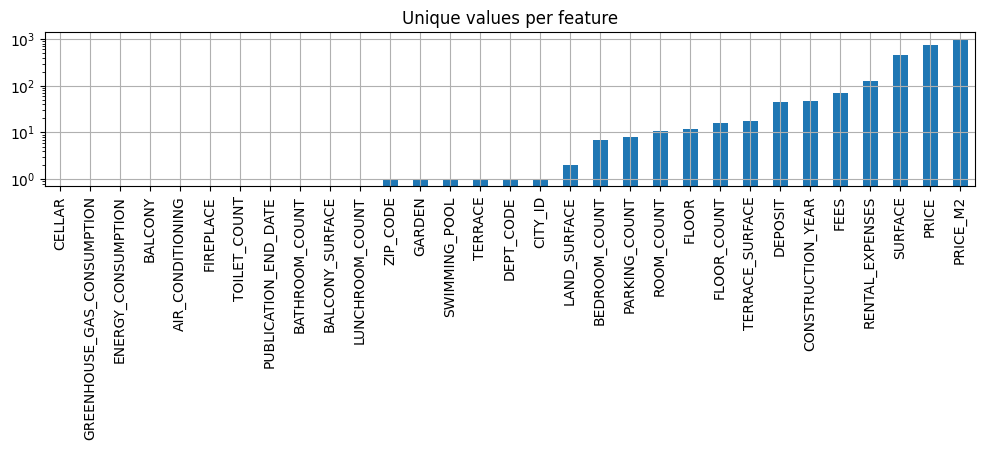

In [10]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(12, 2), title="Unique values per feature")
plt.grid()

#### 1.5 Missing values.

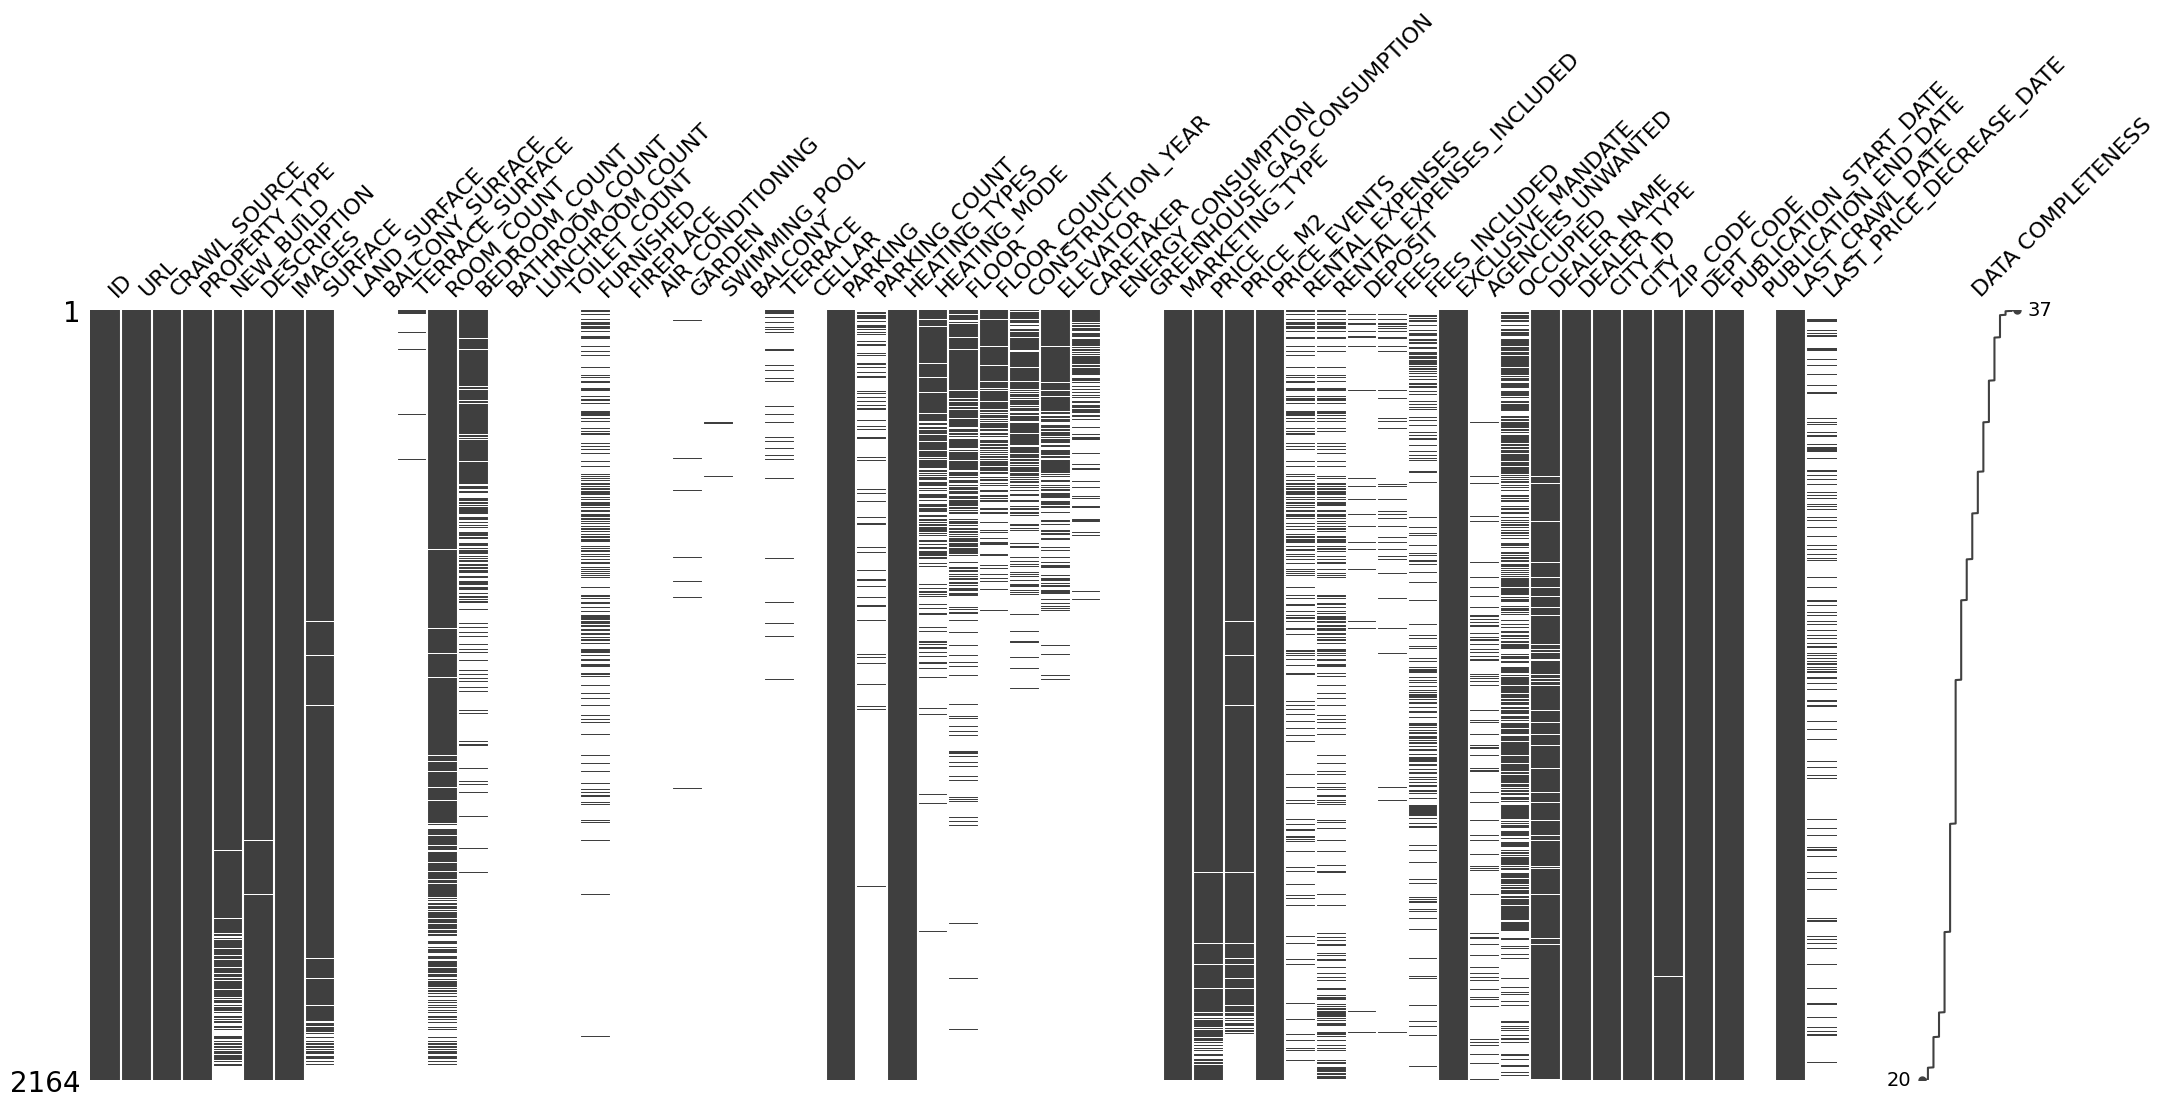

In [11]:
# plt.figure(figsize=(10, 8))
# plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
# plt.xlabel("Column Number")
# plt.ylabel("Sample Number");

msno.matrix(df, labels=True, sort="descending");

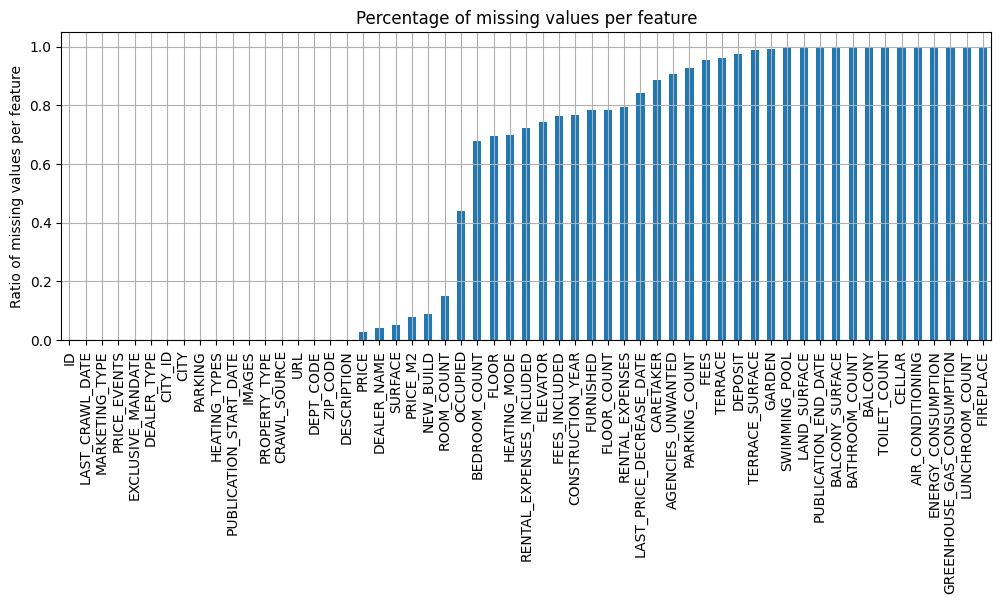

In [12]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(12, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")
plt.grid()

#### 1.6 Features of interest.

##### MARKETING_TYPE

In [13]:
df.MARKETING_TYPE.value_counts()

MARKETING_TYPE
SALE    1219
RENT     945
Name: count, dtype: int64

##### PRICE_EVENTS

Do all PRICE_EVENTS include useful information and at least a price and date? The answer is yes. Additionally, there are between 1 and 10 pricing events (35-36 characters per event). It would be interesting to check the date difference between the different events.

In [14]:
print('The minimum length of a PRICE_EVENT string is: ', df.PRICE_EVENTS.map(len).min())
print('The maximum length of a PRICE_EVENT string is: ', df.PRICE_EVENTS.map(len).max())

The minimum length of a PRICE_EVENT string is:  35
The maximum length of a PRICE_EVENT string is:  935


##### HEATING_TYPES
Is the HEATING_TYPES feature valid? It seems to have mostly missing values.

In [15]:
df.HEATING_TYPES.value_counts()

HEATING_TYPES
[]                           1832
["ELECTRIC"]                  188
["GAS"]                       136
["FUEL"]                        7
["ELECTRIC","UNDERFLOOR"]       1
Name: count, dtype: int64

##### IMAGES

Are there any duplicate IMAGES? If yes and no empty strings, this is a clear indicator of the same person posting on different sites. Also, probably related to the PROPERTY_TYPE feature.

In [16]:
print(len(df.IMAGES.unique()))

1947


In [17]:
print('The minimum length of a IMAGES string is: ', df.IMAGES.map(len).min())
print('The maximum length of a IMAGES string is: ', df.IMAGES.map(len).max())

The minimum length of a IMAGES string is:  2
The maximum length of a IMAGES string is:  3191


How many minimal strings (i.e. missing data) exist? How many non-missing IMAGE rows are duplicated

In [18]:
slength=df['IMAGES'].str.len()
bool_mask=(slength==slength.min())
print('There are ', len(df['DESCRIPTION'][bool_mask]), ' empty IMAGES rows.')
print('There are ', len(df)- len(df.IMAGES.unique()) - len(df['DESCRIPTION'][bool_mask]), ' non-empty duplicated IMAGES rows')

There are  115  empty IMAGES rows.
There are  102  non-empty duplicated IMAGES rows


Are missing IMAGES values ​​associated with a specific PROPERTY_TYPE? Apparently not

In [19]:
df['PROPERTY_TYPE'][bool_mask].value_counts()

PROPERTY_TYPE
APARTMENT    48
PARKING      42
PREMISES     19
HOUSE         6
Name: count, dtype: int64

##### PROPERTY_TYPE

In [20]:
df.PROPERTY_TYPE.value_counts()

PROPERTY_TYPE
APARTMENT    1436
PREMISES      479
PARKING       188
HOUSE          52
BUILDING        9
Name: count, dtype: int64

##### DESCRIPTION

A similar analysis to the IMAGES section is required. It has been observed that there are a few NaN values ​​- replace them with empty strings.
Is there a duplicate DESCRIPTION? If yes and no empty strings, this is a clear indicator of the same person posting on different sites. Also, maybe connected to the PROPERTY_TYPE feature.

In [21]:
print('There are', df.DESCRIPTION.isna().sum(), 'NaN values in the DESCRIPTION field')

There are 4 NaN values in the DESCRIPTION field


In [22]:
print('Replace DESCRIPTION NaN values with empty strings.')
df.DESCRIPTION=df.DESCRIPTION.fillna('');

Replace DESCRIPTION NaN values with empty strings.


In [23]:
print('There are', len(df.DESCRIPTION.unique()), 'unique values in the DESCRIPTION field.')

There are 1915 unique values in the DESCRIPTION field.


In [24]:
print('The minimum length of a DESCRIPTION string is: ', df.DESCRIPTION.map(len).min())
print('The maximum length of a DESCRIPTION string is: ', df.DESCRIPTION.map(len).max())

The minimum length of a DESCRIPTION string is:  0
The maximum length of a DESCRIPTION string is:  2731


How many minimal strings (i.e. missing data) exist? How many non-missing IMAGE rows are duplicated?

In [25]:
slength=df['DESCRIPTION'].str.len()
bool_mask=(slength==slength.min())
print('There are ', len(df['DESCRIPTION'][bool_mask]), ' empty DESCRIPTION rows.')
print('There are ', len(df)- len(df.DESCRIPTION.unique()) - len(df['DESCRIPTION'][bool_mask]), ' non-empty duplicated DESCRIPTION rows')

There are  4  empty DESCRIPTION rows.
There are  245  non-empty duplicated DESCRIPTION rows


Are missing IMAGES values ​​associated with a specific PROPERTY_TYPE? Too little NaN to draw conclusions.

In [26]:
df['PROPERTY_TYPE'][bool_mask].value_counts()

PROPERTY_TYPE
APARTMENT    4
Name: count, dtype: int64

##### SURFACE

We can check the distribution of the surface by type of property.

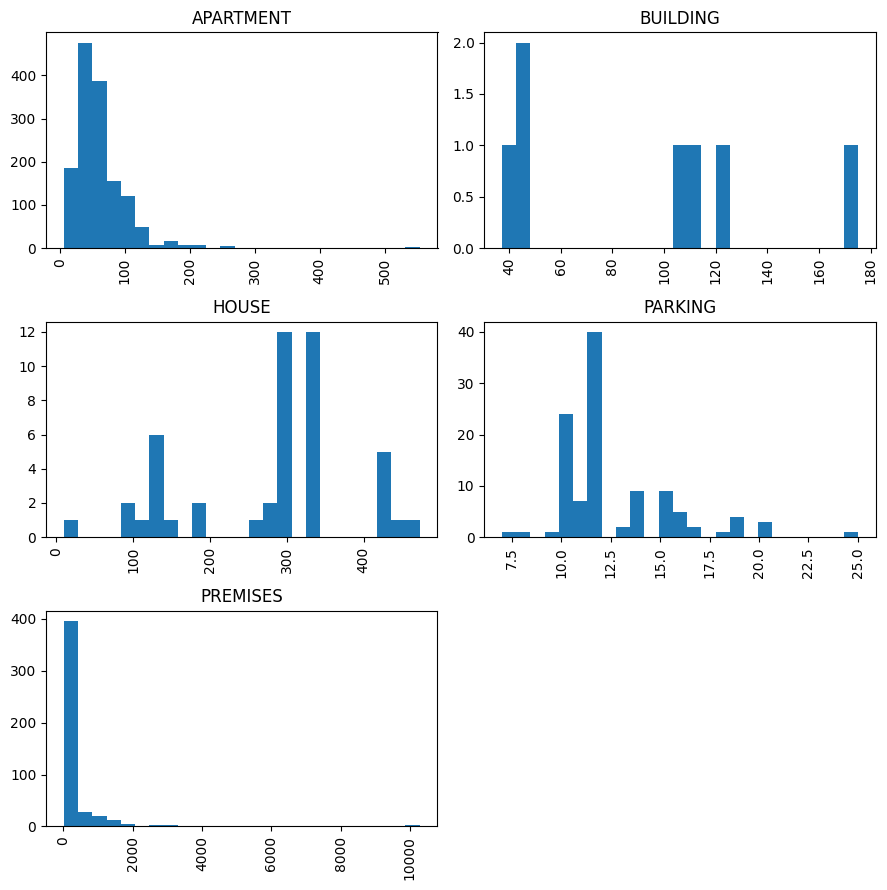

In [27]:
df['SURFACE'].hist(by=df['PROPERTY_TYPE'],bins=25, figsize=(9, 9),
                   grid=True)
plt.title('Surface per different PROPERTY_TYPE');
plt.tight_layout()

With the exception of the PREMISES category (whose content is not very clear), there is only one outlier APARTMENT.

##### PRICE

Nous pouvons vérifier la répartition des PRICE par type de propriété. De plus, il y a des valeurs manquantes dans cette catégorie, qui peuvent être remplies à l'aide de la catégorie PRICE_EVENTS.

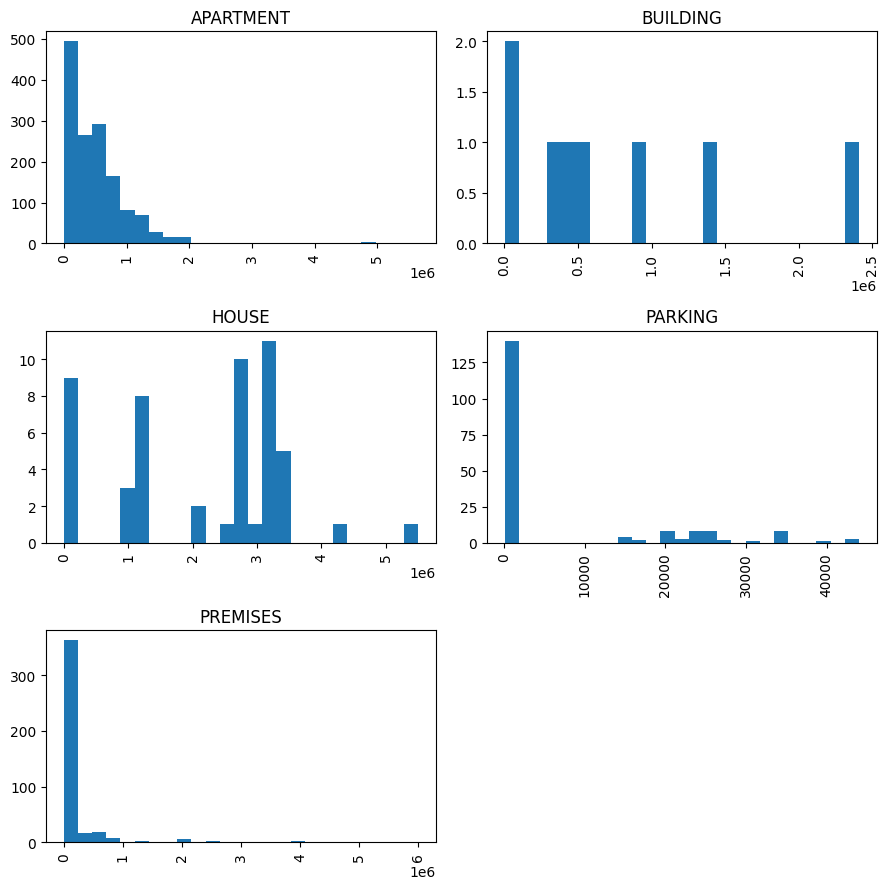

In [28]:
df['PRICE'].hist(by=df['PROPERTY_TYPE'],bins=25, figsize=(9, 9),
                   grid=True)
plt.title('PRICE per different PROPERTY_TYPE');
plt.tight_layout()

## 2. Duplicate alerts.

Three different alerts will be generated:  
2.1 The same IMAGES (not empty) are used in different rows.  
2.2 The same DESCRIPTION (not empty) is used in different lines.  
2.3 The PRICE/SURFACE/PROPERTY_TYPE entries are similar between different rows (where non-empty entries exist for all 3 items).

#### 2.1 The same IMAGES (not empty) are used in different rows.

**POSSIBLE UPGRADE:** Note that this is a quick and messy fix. I would propose that a CNN be trained to recognize similarity characteristics between sets of photos describing each advertisement, thus giving us the probability value that those properties are indeed the same or different.

In [29]:
# Add new alert column in the dataframe. All rows are set to 0. 
# Rows with similar IMAGES will have the same number in their alert_IMAGES field.
df['alert_IMAGES']=0

In [30]:
# Quick and dirty 'for' loop.
count=1
for i in range(0,len(df)):
    
    # If the IMAGES field is not empty and the alert_IMAGES field is 0, proceed.
    if (len(df.IMAGES[i])>2) & (df.alert_IMAGES[i]==0):
        #print(i)
        # Compare IMAGES text of row i with the IMAGES text of all other rows.
        main_str=df.IMAGES[i]
        
        # Set alert only if there are duplicates.
        bool_mask=(df.IMAGES==main_str)
        if sum(bool_mask)>1:
            df.loc[df['IMAGES']==main_str, 'alert_IMAGES']=count
            #print(i, count)
            count=count+1
 
            
    

In [31]:
df.alert_IMAGES.max()

80

**POSSIBLE IMPROVEMENT:** There are 80 cases where our algorithm produced alerts about possible duplicate images. It is very interesting that the 2nd alert concerns a single image, probably the agency's logo due to the lack of real estate images. In this case, we can add a condition that our algorithm only detects cases where more than 2 images are uploaded to the ad.

#### 2.2 The same DESCRIPTION (not empty) is used in different lines.

**POSSIBLE UPGRADE:** Note that this is a quick and messy fix. I would suggest that an LLM be trained or pre-existing used to perform textual analysis of the DESCRIPTION for two purposes:  
    i. Fill in the empty fields with information that might exist in the description.  
    ii. Give us the probability that two descriptions in different rows refer to the same property.

In [32]:
# Add new alert column in the dataframe. All rows are set to 0. 
# Rows with similar DESCRIPTION will have the same number in their alert_DESCRIPTION field.
df['alert_DESCRIPTION']=0

In [43]:
# Quick and dirty 'for' loop.
count=1
for i in range(0,len(df)):
    
    # If the DESCRIPTION field is not empty and the alert_DESCRIPTION field is 0, proceed.
    if (len(df.DESCRIPTION[i])>0) & (df.alert_DESCRIPTION[i]==0):
        #print(i)
        # Compare DESCRIPTION text of row i with the IMAGES text of all other rows.
        main_str=df.DESCRIPTION[i]
        
        # Set alert only if there are duplicates.
        bool_mask=(df.DESCRIPTION==main_str)
        if sum(bool_mask)>1:
            df.loc[df['DESCRIPTION']==main_str, 'alert_DESCRIPTION']=count
            #print(i, count)
            count=count+1

In [34]:
g=np.where(df.alert_DESCRIPTION==2)[0]
g

array([ 18,  57, 567], dtype=int64)

In [35]:
df.DESCRIPTION[g[0]]

"Places Georges Pompidou. Parking situé au 3ème sous-sol d'un immeuble récent d'excellent standing avec accès facile et sécurisé. Building Partners, agence spécialisée dans l'immobilier familial de standing à Levallois-Perret vous accueille du lundi au vendredi de 9h30 à 19h30 au 87 rue Louis Rouquier. Vous pouvez retrouver toutes nos annonces de biens à vendre sur notre site internet ou nous contacter directement au (33) 1.47.31.01. 74."

In [36]:
df.DESCRIPTION[g[1]]

"Places Georges Pompidou. Parking situé au 3ème sous-sol d'un immeuble récent d'excellent standing avec accès facile et sécurisé. Building Partners, agence spécialisée dans l'immobilier familial de standing à Levallois-Perret vous accueille du lundi au vendredi de 9h30 à 19h30 au 87 rue Louis Rouquier. Vous pouvez retrouver toutes nos annonces de biens à vendre sur notre site internet ou nous contacter directement au (33) 1.47.31.01. 74."

In [37]:
df.DESCRIPTION[g[2]]

"Places Georges Pompidou. Parking situé au 3ème sous-sol d'un immeuble récent d'excellent standing avec accès facile et sécurisé. Building Partners, agence spécialisée dans l'immobilier familial de standing à Levallois-Perret vous accueille du lundi au vendredi de 9h30 à 19h30 au 87 rue Louis Rouquier. Vous pouvez retrouver toutes nos annonces de biens à vendre sur notre site internet ou nous contacter directement au (33) 1.47.31.01. 74."

In [38]:
df.alert_DESCRIPTION.max()

160

**POSSIBLE IMPROVEMENT:** There are 160 cases where our algorithm generated alerts about duplicate descriptions. This approach looks promising because it is highly unlikely that two dense texts will be exactly the same unless copied and pasted. An LLM should be used to perform text analysis for best results in cases where the same property is described by different people.

#### 2.2 The PRICE/SURFACE/PROPERTY_TYPE entries are similar between the different lines (where non-empty entries exist for the 3 entities).

**POSSIBLE IMPROVEMENT:**  
i. PRICE values ​​should be updated when missing based on the PRICE_EVENTS field. In fact, to ensure that all prices relating to a property are taken into account, all prices must be extracted from the PRICE_EVENTS field and combined with the SURFACE and PROPERTY_TYPE fields per line studied.   
ii. Note that this is a quick and dirty fix. I would suggest that an LLM be trained or preexisting used to perform textual analysis of the DESCRIPTION to fill in missing values ​​in more fields including ROOM_COUNT, FLOOR, FLOOR_COUNT, CONSTRUCTION_YEAR and others. All of these fields can then be used to produce better results.  
iii. If knowledge of duplicate entries already exists, an ML model can also be trained to increase the efficiency of this algorithm. In fact, the results of the three algorithms developed here can be put together in a training set for this purpose.

In [39]:
# Add new alert column in the dataframe. All rows are set to 0. 
# Rows with similar combined values will have the same number in their alert_COMBVAL field.
df['alert_COMBVAL']=0

In [40]:
# Quick and dirty 'for' loop.
count=1
for i in range(0,len(df)):
    
    # If PRICE, SURFACE and PROPERTY_TYPE fields are not empty and the alert_COMBVAL field is 0, proceed.
    if (df.PRICE[i]>0) & (df.SURFACE[i]>0) & (len(df.PROPERTY_TYPE[i])>0) & (df.alert_COMBVAL[i]==0):
        ind=np.where((df.PRICE==df.PRICE[i]) & (df.SURFACE==df.SURFACE[i]) & (df.PROPERTY_TYPE==df.PROPERTY_TYPE[i]))[0]
        
        if len(ind)>1:
            # print(ind)
            df.loc[ind,['alert_COMBVAL']]=count
            count=count+1
        

In [41]:
g=np.where(df.alert_COMBVAL==5)[0]
g

array([   8, 1487], dtype=int64)

In [42]:
df.loc[g,['PRICE','SURFACE','PROPERTY_TYPE','alert_COMBVAL']]

,PRICE,SURFACE,PROPERTY_TYPE,alert_COMBVAL
8,100.0,11.0,PARKING,5
1487,100.0,11.0,PARKING,5


In [44]:
df.alert_COMBVAL.max()

385

**POSSIBLE IMPROVEMENT:** There are 385 cases where our algorithm generated alerts about duplicate descriptions. This is a relatively large number of instances, it is very likely that this function has many false alarms. To change this, other fields must be added to the comparison, as described in the title section.